<a href="https://colab.research.google.com/github/JustSurWHYving/cloud-coverage-detection/blob/main/gru_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

data2 = pd.read_csv('/content/drive/MyDrive/aims_ccd/train.csv')

<ipython-input-2-bacade8889b5>:3: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv('/content/drive/MyDrive/aims_ccd/train.csv')


In [3]:
data2.head(700000)

,DATE (MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
0,01-Jan,00:00,-0.962276,0.000000,356.85640,7.216,0.988,-7.312,32.33,0.0,9.95,271.3,806.779,0.0,0.219,0.0,0.0
1,01-Jan,00:01,-0.937921,0.000000,357.65505,7.251,1.040,-7.260,32.40,0.0,8.20,272.9,806.840,0.0,0.206,0.0,0.0
2,01-Jan,00:02,-0.944395,0.000000,358.45438,7.256,1.093,-7.207,32.54,0.0,6.70,288.8,806.876,0.0,0.148,0.0,0.0
3,01-Jan,00:03,-0.951350,-0.029673,359.25416,7.254,1.060,-7.440,31.89,0.0,7.70,294.0,806.823,0.0,0.235,0.0,0.0
4,01-Jan,00:04,-0.934976,-0.054401,0.05415,7.331,1.081,-7.419,31.78,0.0,7.20,285.5,806.762,0.0,0.182,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
527036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
527037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
527038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data2 = data2.iloc[:-1,:] ##removing rows from below
data2.head(700000)


,DATE (MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
0,01-Jan,00:00,-0.962276,0.000000,356.85640,7.216,0.988,-7.312,32.33,0.0,9.95,271.3,806.779,0.0,0.219,0.0,0.0
1,01-Jan,00:01,-0.937921,0.000000,357.65505,7.251,1.040,-7.260,32.40,0.0,8.20,272.9,806.840,0.0,0.206,0.0,0.0
2,01-Jan,00:02,-0.944395,0.000000,358.45438,7.256,1.093,-7.207,32.54,0.0,6.70,288.8,806.876,0.0,0.148,0.0,0.0
3,01-Jan,00:03,-0.951350,-0.029673,359.25416,7.254,1.060,-7.440,31.89,0.0,7.70,294.0,806.823,0.0,0.235,0.0,0.0
4,01-Jan,00:04,-0.934976,-0.054401,0.05415,7.331,1.081,-7.419,31.78,0.0,7.20,285.5,806.762,0.0,0.182,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
527035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
527036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
527037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
import pandas as pd
##chekign datatypesin mst, date
def column_data_types(df, column_name):
    column = df[column_name]
    data_types = set()
    for value in column:
        if (type(value)==pd._libs.tslibs.timestamps.Timestamp):
          print(value)
        data_types.add(type(value))
    return data_types
unique_data_types = column_data_types(data2, 'MST')
print(unique_data_types)


{<class 'float'>, <class 'str'>}


In [ ]:
import pandas as pd

month_to_prime = {
    'Jan': 11,
    'Feb': 13,
    'Mar': 17,
    'Apr': 19,
    'May': 23,
    'Jun': 29,
    'Jul': 31,
    'Aug': 37,
    'Sep': 41,
    'Oct': 43,
    'Nov': 47,
    'Dec': 53
}

def convert_date_to_int(date_str):
    if not isinstance(date_str, str):
        return None

    parts = date_str.split('-')

    if parts[0][:3] in month_to_prime:
        month_abbr = parts[0][:3]
        day = int(parts[1])
    else:
        month_abbr = parts[1][:3]
        day = int(parts[0])

    month_prime = month_to_prime[month_abbr]

    result = int(f"{month_prime}{day:02d}")
    return result
data2['Converted Date'] = data2['DATE (MM/DD)'].apply(lambda x: convert_date_to_int(x) if isinstance(x, str) else None)


print(data2.head(10))



In [7]:
data2.drop('DATE (MM/DD)', axis=1, inplace=True)

In [8]:
data2.head()

,MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),Converted Date
0,00:00,-0.962276,0.000000,356.85640,7.216,0.988,-7.312,32.33,0.0,9.95,271.3,806.779,0.0,0.219,0.0,0.0,1101.0
1,00:01,-0.937921,0.000000,357.65505,7.251,1.040,-7.260,32.40,0.0,8.20,272.9,806.840,0.0,0.206,0.0,0.0,1101.0
2,00:02,-0.944395,0.000000,358.45438,7.256,1.093,-7.207,32.54,0.0,6.70,288.8,806.876,0.0,0.148,0.0,0.0,1101.0
3,00:03,-0.951350,-0.029673,359.25416,7.254,1.060,-7.440,31.89,0.0,7.70,294.0,806.823,0.0,0.235,0.0,0.0,1101.0
4,00:04,-0.934976,-0.054401,0.05415,7.331,1.081,-7.419,31.78,0.0,7.20,285.5,806.762,0.0,0.182,0.0,0.0,1101.0


In [19]:
data2.describe()

,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),Converted Date
count,482400.000000,482400.000000,482400.000000,482400.000000,482400.000000,482400.000000,482400.000000,480931.000000,482400.000000,482400.000000,482400.000000,482400.000000,482400.000000,482400.000000,482400.000000,482400.000000
mean,203.417447,241.620827,180.002353,12.467373,5.067534,-2.698022,40.327665,23.611655,2.830681,168.190142,817.087196,0.374163,-2.826314,0.061655,0.129371,2845.286567
std,295.831990,369.333659,101.616425,10.578051,6.865294,7.315305,24.050161,34.740024,2.020588,116.355121,5.136720,1.928488,188.916827,0.237741,0.180258,1198.387755
min,-4.764200,-12.403300,0.000120,-16.690000,-17.351000,-24.830000,4.210000,0.000000,0.000000,0.000000,794.918000,0.000000,-7999.000000,0.000000,0.000000,1101.000000
25%,-1.081940,-0.197820,88.578010,4.170000,-0.261000,-8.109000,21.980000,0.000000,1.450000,44.580000,813.989000,0.000000,0.082000,0.000000,0.000000,1724.000000
50%,7.653785,0.266632,179.992330,13.020000,5.363000,-3.119000,33.630000,0.000000,2.450000,177.300000,817.553000,0.000000,0.656000,0.000000,0.000000,2916.000000
75%,351.550500,537.677250,271.428125,20.770000,11.096000,2.668000,53.010000,37.000000,3.700000,282.200000,820.553000,0.000000,1.032000,0.000000,0.201800,4108.000000
max,1428.650000,1069.200000,359.998560,36.320000,19.416000,17.418000,100.100000,100.000000,23.450000,360.000000,847.963000,28.190000,28.430000,1.000000,2.000000,4730.000000


In [10]:
data2['MST'] = pd.to_datetime(data2['MST'], format='%H:%M').dt.hour + pd.to_datetime(df['MST'], format='%H:%M').dt.minute / 60

SyntaxError: invalid non-printable character U+00A0 (<ipython-input-10-cbbbe4d6063c>, line 1)

In [11]:
data2['MST'] = pd.to_datetime(data2['MST'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

def convert_mst_to_seconds(mst_datetime):
    return mst_datetime.hour * 3600 + mst_datetime.minute * 60 + mst_datetime.second

data2['MST_seconds'] = data2['MST'].apply(convert_mst_to_seconds)

In [17]:
data2.head(69)

,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),Converted Date
0,-0.962276,0.000000,356.85640,7.216,0.988,-7.312,32.33,0.0,9.95,271.3,806.779,0.0,0.219,0.0,0.0,1101.0
1,-0.937921,0.000000,357.65505,7.251,1.040,-7.260,32.40,0.0,8.20,272.9,806.840,0.0,0.206,0.0,0.0,1101.0
2,-0.944395,0.000000,358.45438,7.256,1.093,-7.207,32.54,0.0,6.70,288.8,806.876,0.0,0.148,0.0,0.0,1101.0
3,-0.951350,-0.029673,359.25416,7.254,1.060,-7.440,31.89,0.0,7.70,294.0,806.823,0.0,0.235,0.0,0.0,1101.0
4,-0.934976,-0.054401,0.05415,7.331,1.081,-7.419,31.78,0.0,7.20,285.5,806.762,0.0,0.182,0.0,0.0,1101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,-0.904091,-0.286839,41.70954,7.192,1.087,-7.113,32.95,0.0,4.20,276.5,806.299,0.0,0.265,0.0,0.0,1101.0
65,-0.928250,-0.237384,42.24029,7.236,1.115,-6.985,33.22,0.0,4.95,289.7,806.333,0.0,0.123,0.0,0.0,1101.0
66,-0.929167,-0.252221,42.76549,7.171,1.157,-6.843,33.78,0.0,5.20,286.8,806.361,0.0,0.092,0.0,0.0,1101.0
67,-0.928506,-0.326403,43.28518,7.085,0.979,-7.121,33.17,0.0,4.45,300.6,806.301,0.0,0.280,0.0,0.0,1101.0


In [13]:
data2.describe()

,MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),Converted Date,MST_seconds
count,0,482400.000000,482400.000000,482400.000000,482400.000000,482400.000000,482400.000000,482400.000000,480931.000000,482400.000000,482400.000000,482400.000000,482400.000000,482400.000000,482400.000000,482400.000000,482400.000000,0.0
mean,NaT,203.417447,241.620827,180.002353,12.467373,5.067534,-2.698022,40.327665,23.611655,2.830681,168.190142,817.087196,0.374163,-2.826314,0.061655,0.129371,2845.286567,NaN
min,NaT,-4.764200,-12.403300,0.000120,-16.690000,-17.351000,-24.830000,4.210000,0.000000,0.000000,0.000000,794.918000,0.000000,-7999.000000,0.000000,0.000000,1101.000000,NaN
25%,NaT,-1.081940,-0.197820,88.578010,4.170000,-0.261000,-8.109000,21.980000,0.000000,1.450000,44.580000,813.989000,0.000000,0.082000,0.000000,0.000000,1724.000000,NaN
50%,NaT,7.653785,0.266632,179.992330,13.020000,5.363000,-3.119000,33.630000,0.000000,2.450000,177.300000,817.553000,0.000000,0.656000,0.000000,0.000000,2916.000000,NaN
75%,NaT,351.550500,537.677250,271.428125,20.770000,11.096000,2.668000,53.010000,37.000000,3.700000,282.200000,820.553000,0.000000,1.032000,0.000000,0.201800,4108.000000,NaN
max,NaT,1428.650000,1069.200000,359.998560,36.320000,19.416000,17.418000,100.100000,100.000000,23.450000,360.000000,847.963000,28.190000,28.430000,1.000000,2.000000,4730.000000,NaN
std,NaN,295.831990,369.333659,101.616425,10.578051,6.865294,7.315305,24.050161,34.740024,2.020588,116.355121,5.136720,1.928488,188.916827,0.237741,0.180258,1198.387755,NaN


In [14]:
data2.drop(['MST', 'MST_seconds'], axis=1, inplace=True)

In [16]:
data2.head(69)

,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),Converted Date
0,-0.962276,0.000000,356.85640,7.216,0.988,-7.312,32.33,0.0,9.95,271.3,806.779,0.0,0.219,0.0,0.0,1101.0
1,-0.937921,0.000000,357.65505,7.251,1.040,-7.260,32.40,0.0,8.20,272.9,806.840,0.0,0.206,0.0,0.0,1101.0
2,-0.944395,0.000000,358.45438,7.256,1.093,-7.207,32.54,0.0,6.70,288.8,806.876,0.0,0.148,0.0,0.0,1101.0
3,-0.951350,-0.029673,359.25416,7.254,1.060,-7.440,31.89,0.0,7.70,294.0,806.823,0.0,0.235,0.0,0.0,1101.0
4,-0.934976,-0.054401,0.05415,7.331,1.081,-7.419,31.78,0.0,7.20,285.5,806.762,0.0,0.182,0.0,0.0,1101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,-0.904091,-0.286839,41.70954,7.192,1.087,-7.113,32.95,0.0,4.20,276.5,806.299,0.0,0.265,0.0,0.0,1101.0
65,-0.928250,-0.237384,42.24029,7.236,1.115,-6.985,33.22,0.0,4.95,289.7,806.333,0.0,0.123,0.0,0.0,1101.0
66,-0.929167,-0.252221,42.76549,7.171,1.157,-6.843,33.78,0.0,5.20,286.8,806.361,0.0,0.092,0.0,0.0,1101.0
67,-0.928506,-0.326403,43.28518,7.085,0.979,-7.121,33.17,0.0,4.45,300.6,806.301,0.0,0.280,0.0,0.0,1101.0


In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping

imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data2), columns=data2.columns)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_imputed)

data_scaled = pd.DataFrame(scaled_features, columns=data2.columns)

def create_sequences(data, seq_length=15):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length, -4]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [21]:
sequence_length = 5
X, y = create_sequences(data_scaled.values, sequence_length)

split_idx = int(0.8 * len(X))
X_train, y_train = X[:split_idx], y[:split_idx]
X_val, y_val = X[split_idx:], y[split_idx:]

In [22]:
model = Sequential([
    GRU(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    GRU(32),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, callbacks=[early_stopping])

y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Epoch 1/100
13176/13176 [==============================] - 86s 6ms/step - loss: 0.2193 - val_loss: 0.1615
Epoch 2/100
13176/13176 [==============================] - 78s 6ms/step - loss: 0.0442 - val_loss: 0.0737
Epoch 3/100
13176/13176 [==============================] - 86s 7ms/step - loss: 0.0380 - val_loss: 0.0833
Epoch 4/100
13176/13176 [==============================] - 79s 6ms/step - loss: 0.0381 - val_loss: 0.0737
Epoch 5/100
13176/13176 [==============================] - 79s 6ms/step - loss: 0.0378 - val_loss: 0.0745
Epoch 6/100
13176/13176 [==============================] - 75s 6ms/step - loss: 0.0377 - val_loss: 0.0741
Epoch 7/100
13176/13176 [==============================] - 76s 6ms/step - loss: 0.0377 - val_loss: 0.0736
Epoch 8/100
13176/13176 [==============================] - 77s 6ms/step - loss: 0.0376 - val_loss: 0.0744
Epoch 9/100
13176/13176 [==============================] - 78s 6ms/step - loss: 0.0376 - val_loss: 0.0736
Epoch 10/100
13176/13176 [====================

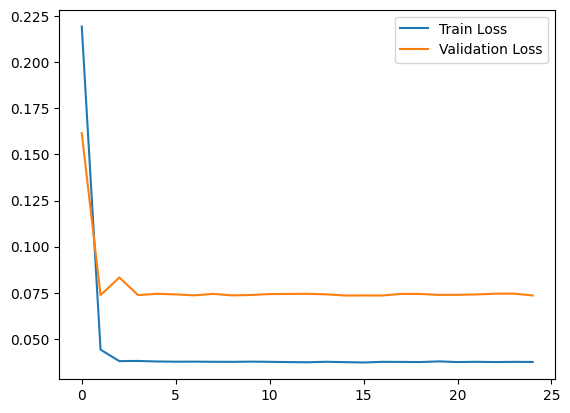

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [24]:
model.save('/content/drive/MyDrive/aims_ccd/gru_model_final.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
